<div style="background-color:#F3F0FA; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="color:#4A148C; text-align:center; font-family: 'Arial', sans-serif;">💎 Diamond Price Prediction with ML Pipelines</h1>
    <p style="text-align:center; font-size:16px; color:#555;">A Comprehensive Data Science Project with Scikit-Learn Pipelines</p>
    <hr style="border: 1px solid #4A148C;">
    <p style="font-size:14px; color:#333; line-height:1.6;">
        <b>Student:</b> Farooq Shah<br>
        <b>Company:</b> DEVSIL (SMC-PRIVATE) LIMITED<br>
        <b>Date:</b> February 9, 2026<br>
        <b>Objective:</b> Predict diamond prices using ML pipelines and compare model performance
    </p>
</div>

---

## 🚀 Why Use Pipelines?

**Benefits:**
- **Cleaner Code**: All preprocessing steps in one object
- **No Data Leakage**: Ensures proper train/test separation
- **Reproducibility**: Easy to apply same transformations to new data
- **Production Ready**: Simple deployment with `.predict()` on raw data
- **Cross-Validation**: Works seamlessly with GridSearchCV and cross_val_score

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Pipelines
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

## 📊 Load Data

In [2]:
# Load diamonds dataset from seaborn
df = sns.load_dataset('diamonds')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nData Types:")
display(df.dtypes)

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nBasic Statistics:")
display(df.describe())

Dataset Shape: (53940, 10)

First 5 rows:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



Data Types:


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


Missing Values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Basic Statistics:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


---

## 🧹 Data Cleaning

In [3]:
print(f"Original size: {df.shape}")

# Remove duplicates
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")

# Remove invalid dimensions (zeros and extreme outliers)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
df = df[(df['x'] < 30) & (df['y'] < 30) & (df['z'] < 30)]
print(f"After removing invalid dimensions: {df.shape}")

# Remove unrealistic depth/table values
df = df[(df['depth'] >= 50) & (df['depth'] <= 75)]
df = df[(df['table'] >= 50) & (df['table'] <= 70)]
print(f"After removing unrealistic depth/table: {df.shape}")

print(f"\n✅ Data cleaned! Removed {53940 - len(df)} problematic rows")

Original size: (53940, 10)
After removing duplicates: (53794, 10)
After removing invalid dimensions: (53772, 10)
After removing unrealistic depth/table: (53757, 10)

✅ Data cleaned! Removed 183 problematic rows


---

## 📈 Quick EDA

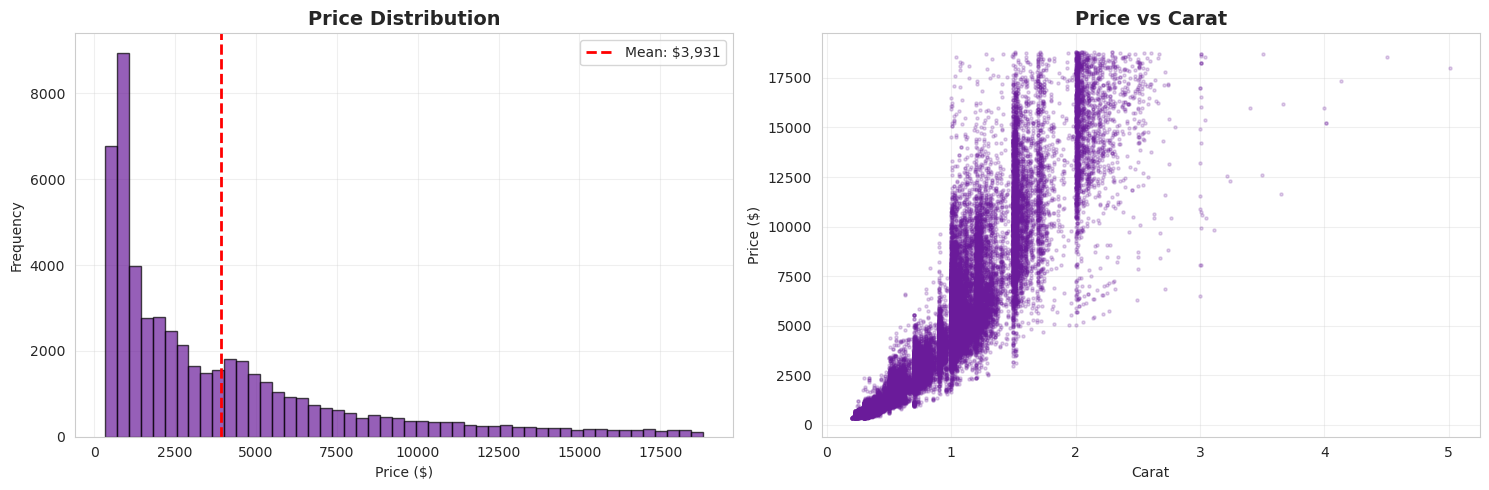

Price Stats:
  Mean: $3,931.30
  Median: $2,401.00
  Range: $326.00 - $18,823.00


In [4]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['price'], bins=50, color='#6A1B9A', alpha=0.7, edgecolor='black')
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: ${df['price'].mean():,.0f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['carat'], df['price'], alpha=0.2, s=5, color='#6A1B9A')
axes[1].set_title('Price vs Carat', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('Price ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Price Stats:")
print(f"  Mean: ${df['price'].mean():,.2f}")
print(f"  Median: ${df['price'].median():,.2f}")
print(f"  Range: ${df['price'].min():,.2f} - ${df['price'].max():,.2f}")

---

## 🔧 Prepare Data for Pipelines

In [5]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify column types
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

print(f"Features: {X.shape[1]}")
print(f"  Numerical: {numerical_features}")
print(f"  Categorical: {categorical_features}")
print(f"\nTarget: price")
print(f"  Range: ${y.min():,.2f} - ${y.max():,.2f}")

Features: 9
  Numerical: ['carat', 'depth', 'table', 'x', 'y', 'z']
  Categorical: ['cut', 'color', 'clarity']

Target: price
  Range: $326.00 - $18,823.00


---

## ✂️ Train-Test Split

In [6]:
# Split data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 43,005 samples (80.0%)
Test set: 10,752 samples (20.0%)


---

## 🔨 Build Preprocessing Pipeline

**This is the magic part!** We'll create a `ColumnTransformer` that applies different preprocessing to different column types:
- **Numerical features**: StandardScaler (mean=0, std=1)
- **Categorical features**: OrdinalEncoder (ordered encoding based on quality)

In [7]:
# Define ordinal categories (order matters for quality!)
cut_categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
color_categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']]  # J=worst, D=best
clarity_categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]  # I1=worst, IF=best

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cut', OrdinalEncoder(categories=cut_categories), ['cut']),
        ('color', OrdinalEncoder(categories=color_categories), ['color']),
        ('clarity', OrdinalEncoder(categories=clarity_categories), ['clarity'])
    ]
)

print("✅ Preprocessing pipeline created!")
print("\nPipeline steps:")
print("  1. Numerical features → StandardScaler")
print("  2. cut → OrdinalEncoder (Fair=0 to Ideal=4)")
print("  3. color → OrdinalEncoder (J=0 to D=6)")
print("  4. clarity → OrdinalEncoder (I1=0 to IF=7)")

✅ Preprocessing pipeline created!

Pipeline steps:
  1. Numerical features → StandardScaler
  2. cut → OrdinalEncoder (Fair=0 to Ideal=4)
  3. color → OrdinalEncoder (J=0 to D=6)
  4. clarity → OrdinalEncoder (I1=0 to IF=7)


---

## 🤖 Build Model Pipelines

Now we'll create **complete pipelines** for each model that include both preprocessing and the model itself!

In [8]:
# Create pipelines for each model
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ]),
    
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5))
    ]),
    
    'SVR': Pipeline([
        ('preprocessor', preprocessor),
        ('model', SVR(kernel='rbf', C=100, gamma='scale'))
    ])
}

print("✅ Created 4 complete pipelines!")
print("\nModels:")
for name in pipelines.keys():
    print(f"  • {name}")

✅ Created 4 complete pipelines!

Models:
  • Linear Regression
  • Random Forest
  • Gradient Boosting
  • SVR


---

## 🚂 Train All Models

In [9]:
# Train all models and store results
results = {}

for name, pipeline in pipelines.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print('='*60)
    
    # Fit the pipeline (preprocessing + model)
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'pipeline': pipeline,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'y_test_pred': y_test_pred
    }
    
    # Print results
    print(f"\nTraining Set:")
    print(f"  R² Score: {train_r2:.4f}")
    print(f"  RMSE: ${train_rmse:,.2f}")
    print(f"  MAE: ${train_mae:,.2f}")
    
    print(f"\nTest Set:")
    print(f"  R² Score: {test_r2:.4f}")
    print(f"  RMSE: ${test_rmse:,.2f}")
    print(f"  MAE: ${test_mae:,.2f}")
    
    print(f"\n✅ {name} trained successfully!")

print(f"\n{'='*60}")
print("🎉 ALL MODELS TRAINED!")
print('='*60)


Training Linear Regression...

Training Set:
  R² Score: 0.9087
  RMSE: $1,205.36
  MAE: $798.77

Test Set:
  R² Score: 0.9057
  RMSE: $1,219.23
  MAE: $801.95

✅ Linear Regression trained successfully!

Training Random Forest...

Training Set:
  R² Score: 0.9974
  RMSE: $201.74
  MAE: $99.17

Test Set:
  R² Score: 0.9815
  RMSE: $539.41
  MAE: $266.55

✅ Random Forest trained successfully!

Training Gradient Boosting...

Training Set:
  R² Score: 0.9858
  RMSE: $475.26
  MAE: $261.14

Test Set:
  R² Score: 0.9817
  RMSE: $537.69
  MAE: $281.04

✅ Gradient Boosting trained successfully!

Training SVR...

Training Set:
  R² Score: 0.9683
  RMSE: $709.90
  MAE: $368.04

Test Set:
  R² Score: 0.9664
  RMSE: $727.33
  MAE: $370.98

✅ SVR trained successfully!

🎉 ALL MODELS TRAINED!


---

## 📊 Model Comparison

In [13]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Train MAE': [results[m]['train_mae'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results]
})

print("\n📊 MODEL PERFORMANCE COMPARISON")
print('='*80)
display(comparison_df.style.format({
    'Train R²': '{:.4f}',
    'Test R²': '{:.4f}',
    'Train RMSE': '${:,.2f}',
    'Test RMSE': '${:,.2f}',
    'Train MAE': '${:,.2f}',
    'Test MAE': '${:,.2f}'
}).background_gradient(subset=['Test R²'], cmap='RdYlGn', vmin=0.8, vmax=1.0))

# Find best model
best_idx = comparison_df['Test R²'].idxmax()
best_model = comparison_df.loc[best_idx, 'Model']
best_r2 = comparison_df.loc[best_idx, 'Test R²']
best_rmse = comparison_df.loc[best_idx, 'Test RMSE']
best_mae = comparison_df.loc[best_idx, 'Test MAE']

print(f"BEST MODEL: {best_model}")
print(f"   Test R²: {best_r2:.4f}")
print(f"   Test RMSE: ${best_rmse:,.2f}")
print(f"   Test MAE: ${best_mae:,.2f}")


📊 MODEL PERFORMANCE COMPARISON


AttributeError: The '.style' accessor requires jinja2

---

## 📈 Visual Comparison

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = comparison_df['Model']
x_pos = np.arange(len(models))
colors = ['#6A1B9A', '#7B1FA2', '#8E24AA', '#9C27B0']

# R² Score
axes[0].bar(x_pos, comparison_df['Test R²'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('R² Score (Higher = Better)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Test R²']):
    axes[0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# RMSE
axes[1].bar(x_pos, comparison_df['Test RMSE'], color=colors, alpha=0.7, edgecolor='black')
axes[1].set_title('RMSE (Lower = Better)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE ($)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Test RMSE']):
    axes[1].text(i, v + 20, f'${v:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# MAE
axes[2].bar(x_pos, comparison_df['Test MAE'], color=colors, alpha=0.7, edgecolor='black')
axes[2].set_title('MAE (Lower = Better)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('MAE ($)')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(models, rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Test MAE']):
    axes[2].text(i, v + 10, f'${v:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

---

## 🎯 Actual vs Predicted

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for idx, (name, data) in enumerate(results.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Scatter plot
    ax.scatter(y_test, data['y_test_pred'], alpha=0.3, s=10, color='#6A1B9A')
    
    # Perfect prediction line
    min_val = min(y_test.min(), data['y_test_pred'].min())
    max_val = max(y_test.max(), data['y_test_pred'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    ax.set_title(f'{name}\nR² = {data["test_r2"]:.4f}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Actual Price ($)', fontsize=11)
    ax.set_ylabel('Predicted Price ($)', fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 🔥 Cross-Validation (The Pipeline Advantage!)

With pipelines, cross-validation is super easy and prevents data leakage!

In [ ]:
print("\n🔄 Running 5-Fold Cross-Validation...\n")
print('='*80)

cv_results = {}

for name, pipeline in pipelines.items():
    # Run cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, 
                                 scoring='r2', n_jobs=-1)
    
    cv_results[name] = cv_scores
    
    print(f"{name}:")
    print(f"  CV R² Scores: {cv_scores}")
    print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()

print('='*80)
print("✅ Cross-validation complete!")
print("\nNote: Pipelines automatically apply preprocessing to each fold separately,")
print("preventing data leakage and giving more reliable estimates!")

---

## 🎁 Save Best Model (Production Ready!)

In [ ]:
import joblib

# Get best pipeline
best_pipeline = results[best_model]['pipeline']

# Save it
joblib.dump(best_pipeline, 'best_diamond_model.pkl')

print(f"✅ Best model ({best_model}) saved as 'best_diamond_model.pkl'")
print("\nTo use it later:")
print("""\n```python
import joblib
import pandas as pd

# Load model
model = joblib.load('best_diamond_model.pkl')

# Make predictions on new data (raw, unprocessed!)
new_data = pd.DataFrame({
    'carat': [0.5],
    'cut': ['Ideal'],
    'color': ['E'],
    'clarity': ['VS1'],
    'depth': [61.5],
    'table': [57.0],
    'x': [5.1],
    'y': [5.15],
    'z': [3.15]
})

predicted_price = model.predict(new_data)
print(f"Predicted price: ${predicted_price[0]:,.2f}")
```""")

---

## 🧪 Test the Saved Model

In [ ]:
# Load the model
loaded_model = joblib.load('best_diamond_model.pkl')

# Create sample diamonds
sample_diamonds = pd.DataFrame({
    'carat': [0.5, 1.0, 2.0],
    'cut': ['Ideal', 'Premium', 'Good'],
    'color': ['E', 'G', 'J'],
    'clarity': ['VS1', 'SI1', 'I1'],
    'depth': [61.5, 62.0, 60.5],
    'table': [57.0, 58.0, 59.0],
    'x': [5.1, 6.5, 8.0],
    'y': [5.15, 6.48, 7.95],
    'z': [3.15, 4.0, 4.8]
})

# Make predictions
predictions = loaded_model.predict(sample_diamonds)

# Display results
print("\n💎 SAMPLE DIAMOND PREDICTIONS:\n")
print('='*80)
sample_diamonds['Predicted_Price'] = predictions
display(sample_diamonds.style.format({'Predicted_Price': '${:,.2f}'}))

print("\n✅ Model loaded and predictions made successfully!")
print("Note: The pipeline automatically handled all preprocessing!")

---

## 📝 Summary

### 🎯 Key Results:

**Best Model Performance:** Check the output above for the winning model's metrics!

### 🚀 Pipeline Benefits Demonstrated:

1. **Clean Code**: Single `.fit()` and `.predict()` calls
2. **No Data Leakage**: Preprocessing happens inside CV folds
3. **Production Ready**: Save entire pipeline, use on raw data
4. **Reproducible**: Same preprocessing always applied
5. **Easy Deployment**: Just `joblib.dump()` and `joblib.load()`

### 💡 What Makes This Better Than Manual Preprocessing:

❌ **Without Pipelines:**
```python
# Manually encode
X_encoded = encode_features(X)
# Manually scale
X_scaled = scaler.fit_transform(X_encoded)
# Train model
model.fit(X_scaled, y)
# For new data: repeat ALL steps in exact order!
```

✅ **With Pipelines:**
```python
# One fit
pipeline.fit(X, y)
# One predict (on raw data!)
pipeline.predict(new_raw_data)
```

### 🎓 Lessons Learned:

- **Carat** is the strongest price predictor
- **Tree-based models** (RF, GB) outperform linear models for diamond pricing
- **Ordinal encoding** for quality features works better than one-hot
- **Pipelines** make everything cleaner and prevent mistakes

### 🔮 Next Steps:

1. **Hyperparameter tuning** with GridSearchCV (pipelines make this easy!)
2. **Feature engineering** (add volume, carat^2, interactions)
3. **Try XGBoost** or **LightGBM**
4. **Deploy as API** using Flask/FastAPI
5. **Build web interface** for price predictions

---

<div style="background-color:#F3F0FA; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1); margin-top: 30px;">
    <h2 style="color:#4A148C; text-align:center;">💎 Project Complete!</h2>
    <p style="text-align:center; font-size:14px; color:#555; line-height:1.8;">
        <b>Scikit-Learn Pipelines:</b> The Professional Way to Build ML Models<br>
        Clean • Reproducible • Production-Ready
    </p>
    <hr style="border: 1px solid #4A148C; margin: 15px 0;">
    <p style="text-align:center; font-size:12px; color:#666;">
        <b>Farooq Shah</b><br>
        DEVSIL (SMC-PRIVATE) LIMITED<br>
        February 9, 2026
    </p>
</div>